# Fatch Data

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
A=pd.read_csv("C:/Users/Anuj.kumar/Desktop/digitsnpixels (1).csv")

In [3]:
A

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Define X and Y

In [4]:
Y = A["label"].values
print(Y)

[1 0 1 ... 7 6 9]


In [5]:
X = A.iloc[:,1:785].values
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
X.shape

(42000, 784)

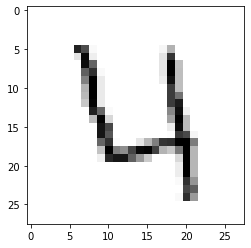

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X[3].reshape(28,28),cmap=plt.cm.binary)

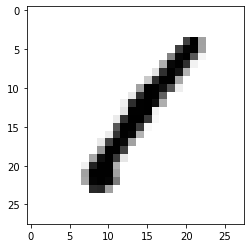

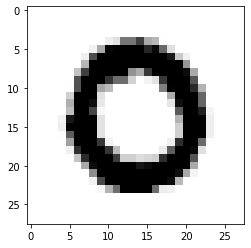

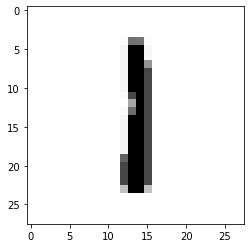

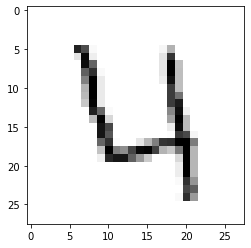

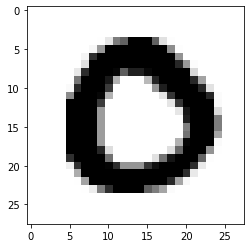

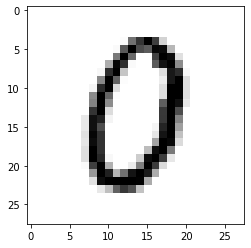

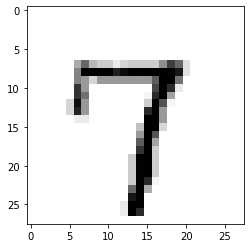

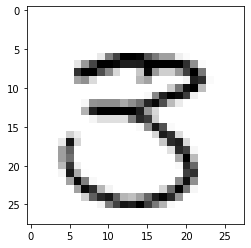

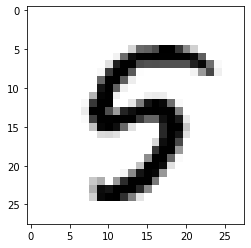

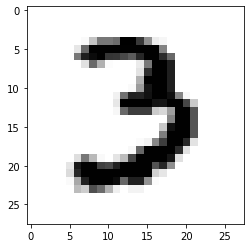

In [8]:
for i in range(0,10,1):
    plt.imshow(X[i].reshape(28,28),cmap=plt.cm.binary)
    plt.show()

<AxesSubplot:>

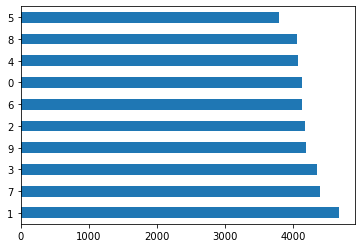

In [9]:
A.label.value_counts().plot(kind="barh")

# ONE HOT ENCODING

In [10]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y)

In [11]:
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [12]:
X = X/255

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X1=ss.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=41)

In [14]:
xtrain.shape

(33600, 784)

In [15]:
xtest.shape

(8400, 784)

In [16]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

In [17]:
xtrain.shape

(33600, 28, 28, 1)

In [18]:
xtest.shape

(8400, 28, 28, 1)

In [19]:
xtrain

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# CNN

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization

In [21]:
nn = Sequential()
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

nn.add(Flatten())
nn.add(Dense(units=128,activation="relu"))
nn.add(Dense(units=128,activation="relu"))
nn.add(Dense(units=10,activation="softmax"))

In [22]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
nn.fit(xtrain,ytrain,batch_size=64,epochs=2,validation_data=(xtest,ytest))

Epoch 1/2
525/525 [==============================] - 13s 24ms/step - loss: 0.3191 - accuracy: 0.8976 - val_loss: 0.1334 - val_accuracy: 0.9595
Epoch 2/2
525/525 [==============================] - 11s 22ms/step - loss: 0.1246 - accuracy: 0.9606 - val_loss: 0.0721 - val_accuracy: 0.9775


In [23]:
from numpy import argmax
pred = nn.predict(xtest)

In [24]:
pred

array([[1.30608723e-05, 1.04722695e-07, 3.93888076e-05, ...,
        4.28986851e-07, 9.98935282e-01, 2.02769457e-04],
       [1.51977119e-07, 2.35013995e-05, 4.42621695e-06, ...,
        3.95269861e-04, 6.15207537e-05, 6.42619707e-05],
       [5.73351011e-09, 1.13332852e-07, 9.27065557e-05, ...,
        5.86920294e-07, 4.93325933e-06, 6.24518975e-07],
       ...,
       [5.19892592e-06, 1.10594316e-08, 2.29458146e-06, ...,
        2.16436966e-08, 7.89088517e-06, 1.19774211e-06],
       [1.24248277e-06, 1.65620833e-08, 4.70984878e-06, ...,
        1.94022238e-08, 9.12564064e-06, 4.89388654e-08],
       [1.81336696e-10, 7.12041481e-10, 9.12556875e-09, ...,
        4.56870125e-10, 8.59870051e-05, 7.96096265e-06]], dtype=float32)

In [25]:
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9
0,1.306087e-05,1.047227e-07,3.938881e-05,4.323089e-04,4.634678e-07,3.159300e-04,6.023307e-05,4.289869e-07,9.989353e-01,2.027695e-04
1,1.519771e-07,2.350140e-05,4.426217e-06,6.794323e-06,9.994084e-01,3.521070e-05,4.636200e-07,3.952699e-04,6.152075e-05,6.426197e-05
2,5.733510e-09,1.133329e-07,9.270656e-05,9.998974e-01,6.014595e-09,3.578312e-06,1.051921e-10,5.869203e-07,4.933259e-06,6.245190e-07
3,6.057552e-05,3.432449e-06,1.661810e-01,8.318515e-01,4.998177e-08,5.590150e-04,2.810540e-07,2.203896e-04,1.039747e-03,8.404860e-05
4,4.332948e-07,3.723743e-03,9.962365e-01,2.666413e-06,2.820903e-10,6.228894e-08,9.718048e-08,1.945463e-06,3.456139e-05,3.620270e-08
...,...,...,...,...,...,...,...,...,...,...
8395,1.228660e-06,1.080999e-07,8.193137e-03,1.248070e-04,1.128075e-07,3.189019e-05,1.821000e-05,6.196220e-06,9.915560e-01,6.822967e-05
8396,9.999990e-01,3.578462e-09,2.047047e-07,1.639612e-09,1.087146e-08,8.242665e-09,3.327433e-07,8.720020e-08,1.757163e-08,2.767192e-07
8397,5.198926e-06,1.105943e-08,2.294581e-06,2.450274e-07,2.252416e-06,1.255291e-04,9.998554e-01,2.164370e-08,7.890885e-06,1.197742e-06
8398,1.242483e-06,1.656208e-08,4.709849e-06,8.036570e-08,3.218522e-06,5.208527e-06,9.999763e-01,1.940222e-08,9.125641e-06,4.893887e-08


In [26]:
xtest.shape

(8400, 28, 28, 1)

In [27]:
pred = argmax(pred,axis=1)

In [28]:
pred

array([8, 4, 3, ..., 6, 6, 5], dtype=int64)

In [29]:
XT = xtest*255

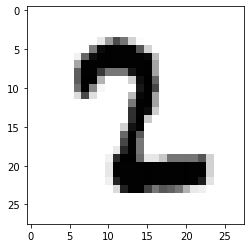

In [30]:
plt.imshow(XT[4].reshape(28,28),cmap=plt.cm.binary)

In [31]:
pred[0]

8

--------------
Predicted value 8
--------------


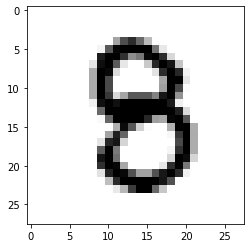

--------------
Predicted value 4
--------------


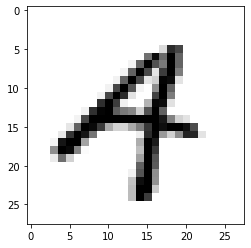

--------------
Predicted value 3
--------------


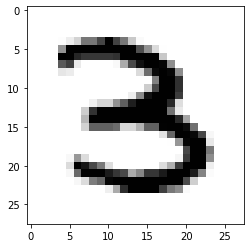

--------------
Predicted value 3
--------------


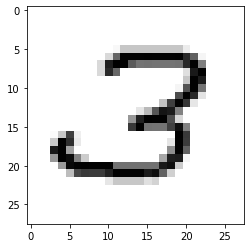

--------------
Predicted value 2
--------------


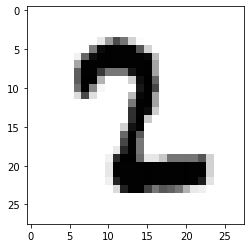

--------------
Predicted value 0
--------------


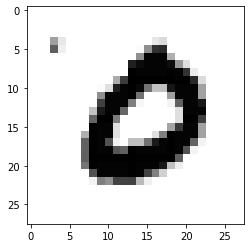

--------------
Predicted value 6
--------------


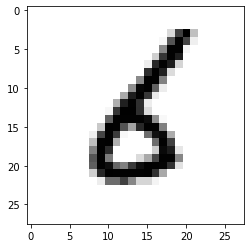

--------------
Predicted value 2
--------------


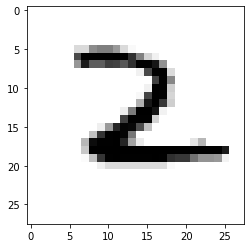

--------------
Predicted value 6
--------------


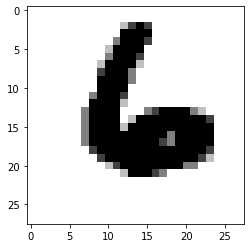

--------------
Predicted value 2
--------------


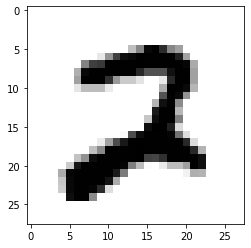

In [33]:
for i in range(0,10,1):
    print("--------------")
    print("Predicted value",pred[i])
    print("--------------")
    plt.imshow(XT[i].reshape(28,28),cmap=plt.cm.binary)
    plt.show()